In [354]:
from imports_for_ML import *
#importing the whole original imports_fol_ML file

In [446]:
#importing the necessary libraries
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import random
from keras.models import load_model

In [ ]:
img_dir = r'/Users/marcelkapica/Downloads/Class_12/train' #specify directory with images
X, y = load_images(img_dir, n_images=10000, resize=(50, 50))
# loading 10000 images and labels and resizing images to 50x50 pixels because i dont have a supercomputer neither lots of time

# resizing to bigger size would increase accuracy, loading more images would increase accuracy, accuracy is still high (from what i have found out on internet it is really hard to get over 84% accuracy on this dataset)
# manually renaming labels of misleading pictures would increase accuracy too, but use of original dataset folder is required
# scarping matching labeled data from internet would increase accuracy too, but use of original dataset folder is required
# scraping matching unlabaled data predicting on it and adding most confident predictions to dataset would increase accuracy too, but use of original dataset folder is required

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23) #splitting data into training and testing sets, test_size is only 0.1 because we have a lot of data (10000 images)

In [ ]:
# if we resized images to bigger ones some of the solutions used below could not apply (different solutions could be better)

# Create a Sequential model - a linear stack of layers - to build the CNN
model = Sequential()

# input layer - 50x50 pixels with 3 color channels (RGB)
model.add(Input(shape=(50, 50, 3)))

# batch normalization squishes values to have mean 0 and variance 1
# i have red that we should not put it before convolution but actually i always got better results when doing so
model.add(BatchNormalization())
# convolution multiplies matrices to extract features like edges
# first convolution with 16 filters, each 3x3 pixels, and ReLU activation function as it mimics how actual brain works
model.add(Conv2D(16, (3, 3), activation='relu'))
# max pooling splits the matrix into smaller matrices and keeps the highest value
# reduces the size of the matrix while maintaining important information
# prevents overfitting and reduces computational complexity
model.add(MaxPooling2D(pool_size=(3, 3)))
# dropout on convolution layer works different than on dense layer
# rather than dropping out neurons, it adds noise to the data and i always got better results with it
# i have red that dropout should be smaller on convolution layers than on dense and it matched the results of creating different models
model.add(Dropout(0.1))

# Second Convolutional Block
model.add(BatchNormalization())
# this time 64 different filters
model.add(Conv2D(64, (3, 3), activation='relu'))
# this time 2x2 pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# I always got better results with droupout here as well
model.add(Dropout(0.1))

# Flatten the matrix into a vector to feed into the dense layer
model.add(Flatten())

# first dense layer with 128 neurons to get many outputs from the whole processed image flattened and ReLU activation function as it mimics how actual brain works
model.add(Dense(128, activation='relu'))
# dropout on dense layer to prevent overfitting
model.add(Dropout(0.5))
# second dense layer with 16 neurons to condense these 128 neurons for previous dense layer and ReLU activation function
model.add(Dense(16, activation='relu'))
# dropout on dense layer to prevent overfitting
model.add(Dropout(0.5))
# Output Layer - sigmoid for binary crossentropy (to get values from 0 to 1 as an output in one part)
model.add(Dense(1, activation='sigmoid'))

# Compile the model - binary_crossentropy as simple loss function for binary classification, adam as modern good optimizer 
# Accuracy as a metric because we dont care more about labeling dogs right than cats or vice versa we want the best overall performance
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary 1.58mb is not a lot so i dont bother with making it smaller, time of training on my laptop is still good (3min 20sec)
model.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_29          │ (None, 50, 50, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 48, 48, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16, 16, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 14, 14, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 413,421 (1.58 MB)

 Trainable params: 413,383 (1.58 MB)

 Non-trainable params: 38 (152.00 B)

In [359]:
stop_early = EarlyStopping(patience=4) # 'patience=4' means training will stop if the validation loss does not improve for 4 consecutive epochs this shuts down the training if the model stops learning
history = model.fit(X_train, y_train, epochs=100, validation_split=0.07, callbacks=[stop_early]) # maximum of 100 epochs, validation split of 0.07 means 7% of the training data will be used for validation

Epoch 1/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5050 - loss: 0.7561 - val_accuracy: 0.5143 - val_loss: 0.6930
Epoch 2/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5195 - loss: 0.6917 - val_accuracy: 0.5825 - val_loss: 0.6718
Epoch 3/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5612 - loss: 0.6710 - val_accuracy: 0.6619 - val_loss: 0.6504
Epoch 4/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6087 - loss: 0.6460 - val_accuracy: 0.6841 - val_loss: 0.6176
Epoch 5/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6353 - loss: 0.6301 - val_accuracy: 0.7159 - val_loss: 0.5955
Epoch 6/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6484 - loss: 0.6192 - val_accuracy: 0.7206 - val_loss: 0.5584
Epoch 7/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6684 - loss: 0.5991 - val_accuracy: 0.7413 - val_loss: 0.5410
Epoch 8/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6794 - loss: 0.5652 -

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8887 - loss: 0.2592
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7870 - loss: 0.4693


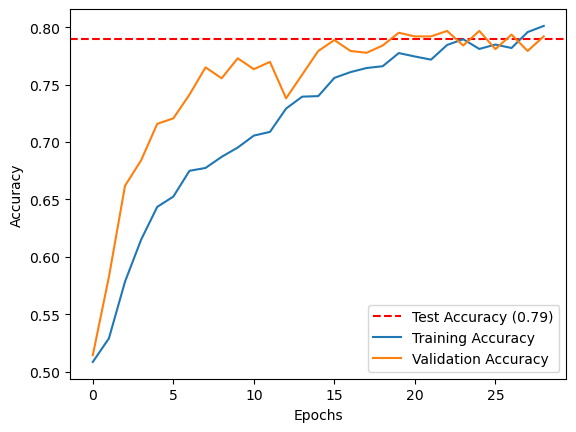

In [480]:
#additional plot of accuracy
train_acc = model.evaluate(X_train, y_train)[1] # [1] because the function returns loss as well and we want to extract accuracy
test_loss, test_acc = model.evaluate(X_test, y_test) # extract test loss and accuracy 
plt.axhline(y=test_acc, color='r', linestyle='--', label=f'Test Accuracy ({test_acc:.2f})') # test accuracy is a horizontal line because it is a single value measured when the model is trained
plt.plot(history.history['accuracy'], label='Training Accuracy') # plotting training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # plotting validation accuracy over epochs
plt.ylabel('Accuracy') # name the y axis
plt.xlabel('Epochs') # name the x axis
plt.legend() # show the legend
plt.show()

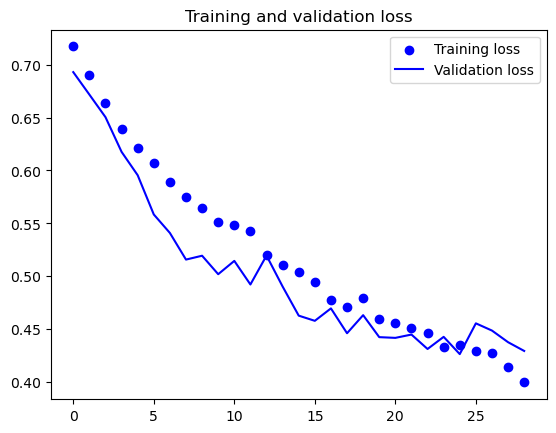

In [375]:
# to create dots on the plot we use scatter plot
plt.scatter(history.epoch, history.history['loss'], color='blue', label='Training loss')
# to create a line on the plot we use plt.plot
plt.plot(history.epoch, history.history['val_loss'], color='blue', label='Validation loss')
plt.title('Training and validation loss') # setting the same title as in the assignment example
plt.legend() # show the legend as in the assignment example
plt.show()
# the training 


In [374]:
# presenting accuracy and loss on the test set as specified in the assignment
print(f"Accuracy on the test set: {test_acc}")
print(f"Loss on the test set: {test_loss}")

Accuracy on the test set: 0.7900000214576721
Loss on the test set: 0.46969321370124817


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


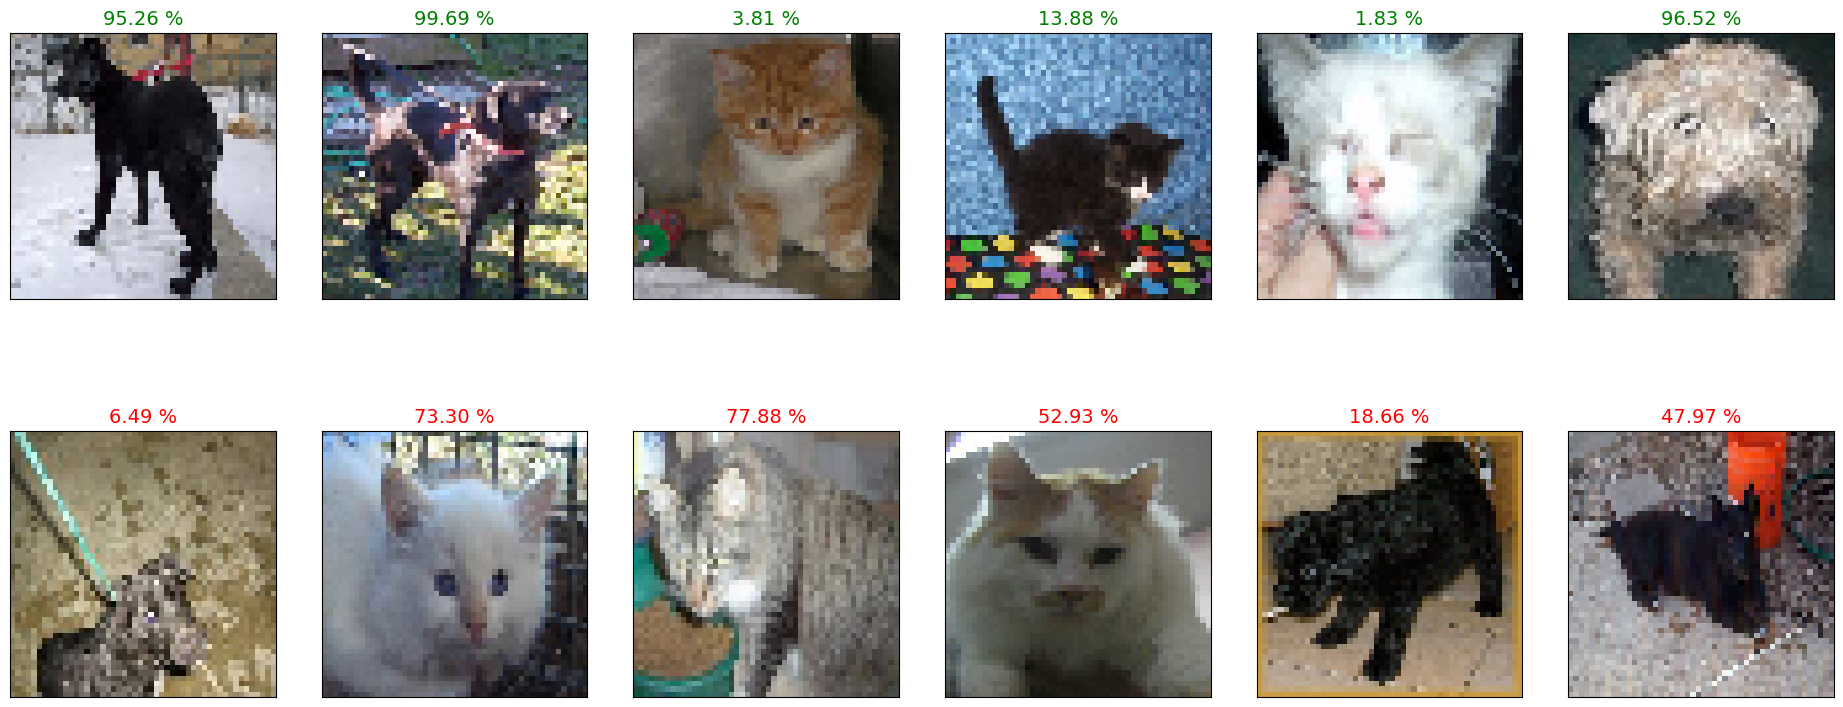

In [ ]:
predictions = model.predict(X_test) # get predictions for the test set


# Find correctly and incorrectly labeled indices
#for every item in predictions check if prediction is greater than 0.5 and if y_test is equal to 1 (dog) if so add to correct indices if both are false (prediction < 0.5 and y_test = 0) then whole statement is true and also add to correct indices (cat)
correct_indices = [i for i in range(len(predictions)) if (predictions[i] > 0.5) == (y_test[i] == 1)] 
#same as above but with incorrect indices (when predictions dont match with y_test)
incorrect_indices = [i for i in range(len(predictions)) if (predictions[i] > 0.5) != (y_test[i] == 1)]

# Randomly select 6 correct and 6 incorrect indices
random_correct_indices = random.sample(correct_indices, 6)
random_incorrect_indices = random.sample(incorrect_indices, 6)

# Create a figure with 2 rows and 6 columns for displaying images
fig, axes = plt.subplots(2, 6, figsize=(19, 7))



# Plot correctly classified images in the first row
for i, idx in enumerate(random_correct_indices):
    ax = axes[0, i]  # First row (index 0) for correct predictions
    ax.imshow(X_test[idx] / 255)  # Normalize pixel values for display
    ax.set_xticks([]) #remove ticks
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])  
    prob = predictions[idx][0] * 100  # Extract the predicted probability
    ax.set_title(f"{prob:.2f} %", color='green', fontsize= 14)  # Display probability with a green title and 2 decimal places

# Plot incorrectly classified images in the second row
for i, idx in enumerate(random_incorrect_indices):
    ax = axes[1, i]  # Second row (index 1) for incorrect predictions
    ax.set_xticks([]) # remove ticks
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(X_test[idx] / 255)  # Normalize pixel values for display
    prob = predictions[idx][0] * 100 # Extract the predicted probability
    ax.set_title(f"{prob:.2f} %", color='red', fontsize= 14)  # Display probability with a red title and 2 decimal places and correct font size

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0)  # Adjust vertical spacing between rows
plt.show()

In [379]:
#dog example
# specify image path and resize so it fits the model
my_image = load_img("/Users/marcelkapica/Downloads/doge.jpg",
                    target_size=(50,50))
# convert image to array
image_array = img_to_array(my_image) 

# expand dimensions to match the model input shape, adds batch size = 1
image_array = np.expand_dims(image_array, axis=0)

# predict if cat or dog on the image
prediction = model.predict(image_array)[0][0]
print(f"Raw prediction: {prediction}")

# if model thinks it's a cat
if prediction < 0.5:
    confidence = (1 - prediction) * 100  # Confidence for "cat"
    print(f"The model thinks it's a cat with {confidence:.2f}% confidence.")
else: # if model thinks it's a dog
    confidence = prediction * 100  # Confidence for "dog"
    print(f"The model thinks it's a dog with {confidence:.2f}% confidence.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Raw prediction: 0.9992155432701111
The model thinks it's a dog with 99.92% confidence.


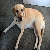

In [381]:
# the model is right
# display image of the dog
my_image

In [380]:
#cat example
my_image1 = load_img("/Users/marcelkapica/Downloads/catsy.png",
                    target_size=(50,50))
image_array1 = img_to_array(my_image1) 

image_array1 = np.expand_dims(image_array1, axis=0)

prediction1 = model.predict(image_array1)[0][0]
print(f"Raw prediction: {prediction1}")

if prediction1 < 0.5:
    confidence1 = (1 - prediction1) * 100  
    print(f"It's a cat with {confidence1:.2f}% confidence.")
else:
    confidence1 = prediction1 * 100  
    print(f"It's a dog with {confidence1:.2f}% confidence.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Raw prediction: 0.0519237257540226
It's a cat with 94.81% confidence.


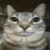

In [382]:
# the model is right
# display image of the cat
my_image1

In [481]:
# save the model
model.save('MARCEL_KAPICA_50061_MODEL.keras')